In [1]:
import sheap
from sheap.MainSheap import Sheapectral 
from sheap.Plotting.SheapPlot import SheapPlot
from sheap.spectra_readers import parallel_reader 

In [2]:
from jax import config
config.update("jax_enable_x64", True)
from pathlib import Path
import glob 

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
spectrum_dic = Path(sheap.__file__).resolve().parent / "SuportData" / "Spectrum"
files = glob.glob(f"{spectrum_dic}/*")


- Small example on how to use sheap, first we need to read the spectrums for this we use the function **parallel_reader**

In [33]:
coords,spectra,_ = parallel_reader(files,parallel=False) 
z = [0.184366,0.161769]

Doing the reading not parallel.


In [34]:
# coords,spectra,_ = parallel_reader([files[0]]) 
# z = [0.161769]

In [35]:
sheapspectral = Sheapectral(spectra,z=z,coords=coords)

extinction correction will be do it, change 'extinction_correction' to done if you want to avoid this step
redshift correction will be do it, change 'redshift_correction' to done if you want to avoid this step


<Axes: xlabel='Wavelength [Å]', ylabel='Flux [arb]'>

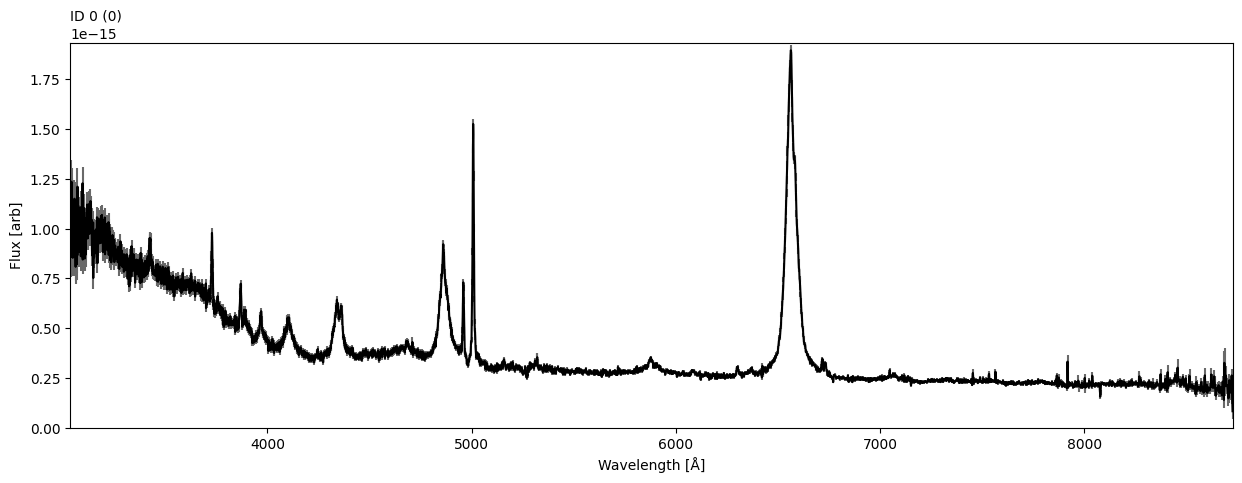

In [36]:
sheapspectral.quicklook(0)

In [62]:
sheapspectral.build_region(4000,5500,n_broad=1)

added OP template


In [63]:
sheapspectral.fit_region(num_steps_list=[3000,3000])

Fitting 2 spectra
STEP1
learning_rate: 0.1 num_steps: 3000 non_optimize_in_axis: 3
STEP2
learning_rate: 0.01 num_steps: 3000 non_optimize_in_axis: 4
running uncertainty


In [64]:
sheapspectral.params_dict

{'logFWHM_feop_21_fe': 0,
 'shift_feop_21_fe': 1,
 'scale_feop_21_fe': 2,
 'amplitude_OIIIa_1_narrow': 3,
 'center_OIIIa_1_narrow': 4,
 'width_OIIIa_1_narrow': 5,
 'amplitude_OIIIb_1_narrow': 6,
 'center_OIIIb_1_narrow': 7,
 'width_OIIIb_1_narrow': 8,
 'amplitude_OIIIc_1_narrow': 9,
 'center_OIIIc_1_narrow': 10,
 'width_OIIIc_1_narrow': 11,
 'amplitude_HeIId_1_narrow': 12,
 'center_HeIId_1_narrow': 13,
 'width_HeIId_1_narrow': 14,
 'amplitude_HeIId_1_broad': 15,
 'center_HeIId_1_broad': 16,
 'width_HeIId_1_broad': 17,
 'amplitude_HeIc_1_narrow': 18,
 'center_HeIc_1_narrow': 19,
 'width_HeIc_1_narrow': 20,
 'amplitude_HeIc_1_broad': 21,
 'center_HeIc_1_broad': 22,
 'width_HeIc_1_broad': 23,
 'amplitude_HeId_1_narrow': 24,
 'center_HeId_1_narrow': 25,
 'width_HeId_1_narrow': 26,
 'amplitude_HeId_1_broad': 27,
 'center_HeId_1_broad': 28,
 'width_HeId_1_broad': 29,
 'amplitude_Hd_1_narrow': 30,
 'center_Hd_1_narrow': 31,
 'width_Hd_1_narrow': 32,
 'amplitude_Hd_1_broad': 33,
 'center_Hd_1_

In [65]:
sheapspectral.uncertainty_params[0]

Array([9.35955550e+02, 9.35955550e+02, 1.02513789e-19, 8.14183974e-18,
       2.75068655e-01, 3.04441117e-01, 7.82809579e-18, 7.52363286e-02,
       7.23941390e-02, 1.14161119e-17, 2.94655015e-02, 2.70516535e-02,
       6.28373140e-18, 5.78796720e-01, 6.06174131e-01, 1.97946877e-18,
       5.58081699e+00, 4.95597303e+00, 1.29154694e-17, 6.78570688e-01,
       7.37271647e-01, 2.91947996e-18, 9.35955550e+02, 9.35955550e+02,
       1.02761899e-17, 6.46307178e-01, 6.49046004e-01, 2.49486041e-18,
       1.75763599e+01, 1.36719193e+01, 9.40975770e-18, 5.55653518e-01,
       6.14901423e-01, 3.79896934e-18, 6.26633740e-01, 6.59902268e-01,
       8.52570751e-18, 4.42124569e-01, 5.08384996e-01, 4.59705916e-18,
       3.62073018e-01, 3.39380631e-01, 9.96657401e-18, 1.60259159e-01,
       1.73793371e-01, 3.70134450e-18, 2.16753970e-01, 2.33730474e-01,
       1.22829427e-02, 3.17165936e-17], dtype=float64)

In [66]:
sp = SheapPlot(sheapspectral)

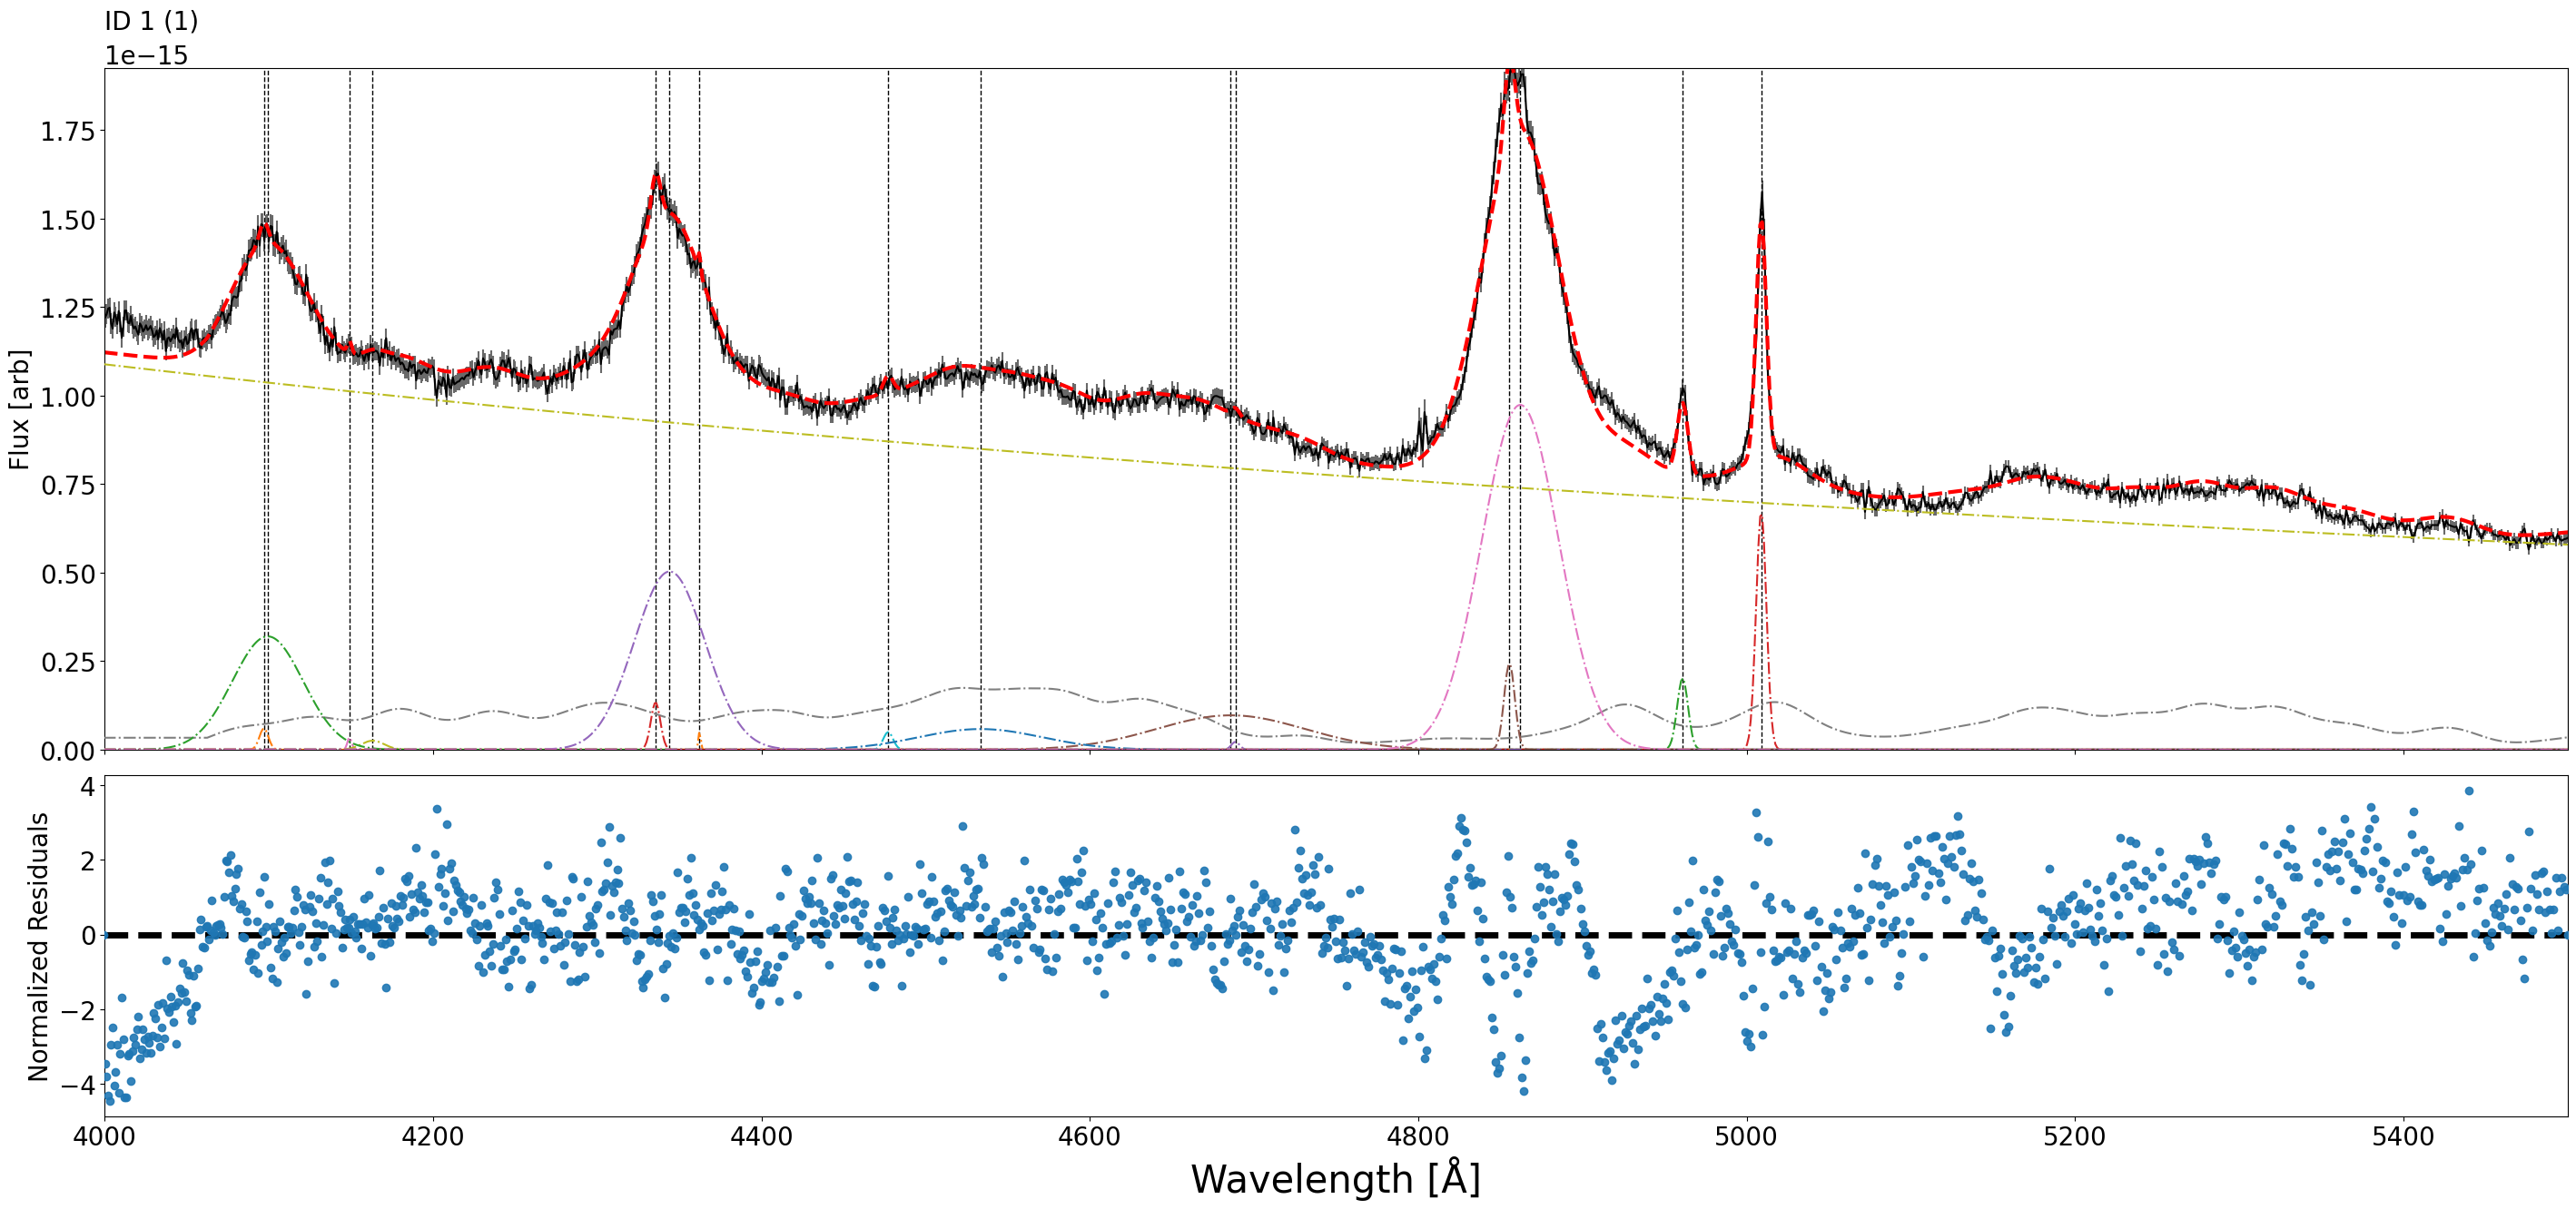

In [67]:
sp.plot(1)